In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

import functions as f

In [2]:
img1 = Image.open("nikol.png")
img1.load()
img2 = Image.open("quay.jpg")
img2.load()
img3 = Image.open("lenna.png")
img3.load()
img4 = Image.open("scan.jpg")
img4.load()

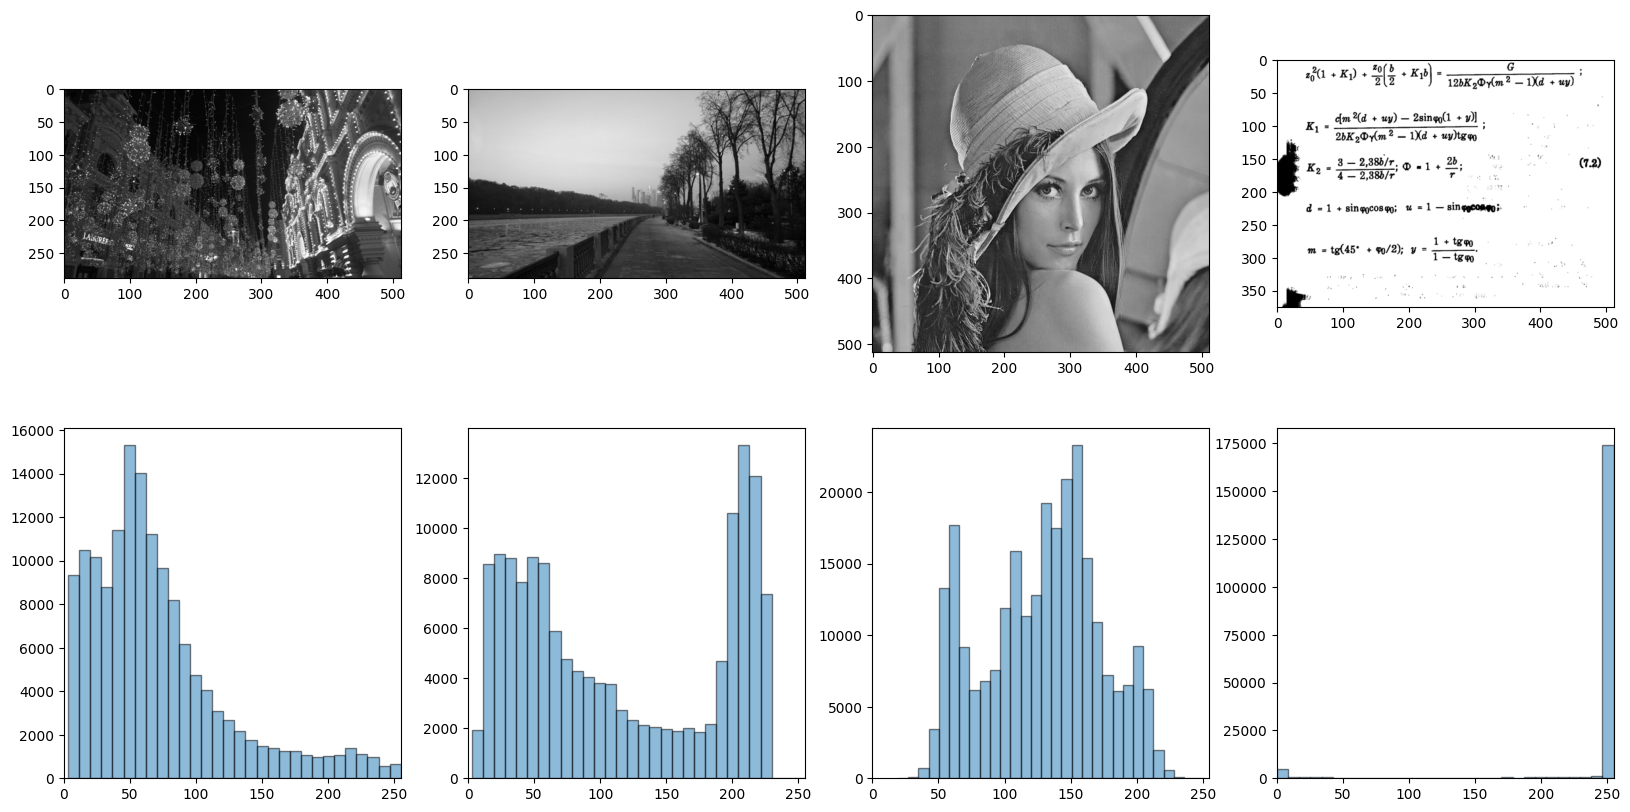

In [3]:
images = [img1, img2, img3, img4]

for i in range(len(images)):
    images[i] = images[i].resize(f.calc_size(images[i].size, 512))
    
gray_images = []
for img in images:
    gray_images.append(f.make_grey(img))

f.draw_plots(gray_images, (20, 10))

In [4]:
def change_intence(img, k, b):
    img = np.array(img)
    img_ci = []
    for x in img:
        x_ci = (k*x + b).astype("int16")   
        x_ci = np.where(x_ci < 0, 0, x_ci).astype("int16")
        x_ci = np.where(x_ci > 255, 255, x_ci)
        img_ci.append(x_ci)
    return img_ci

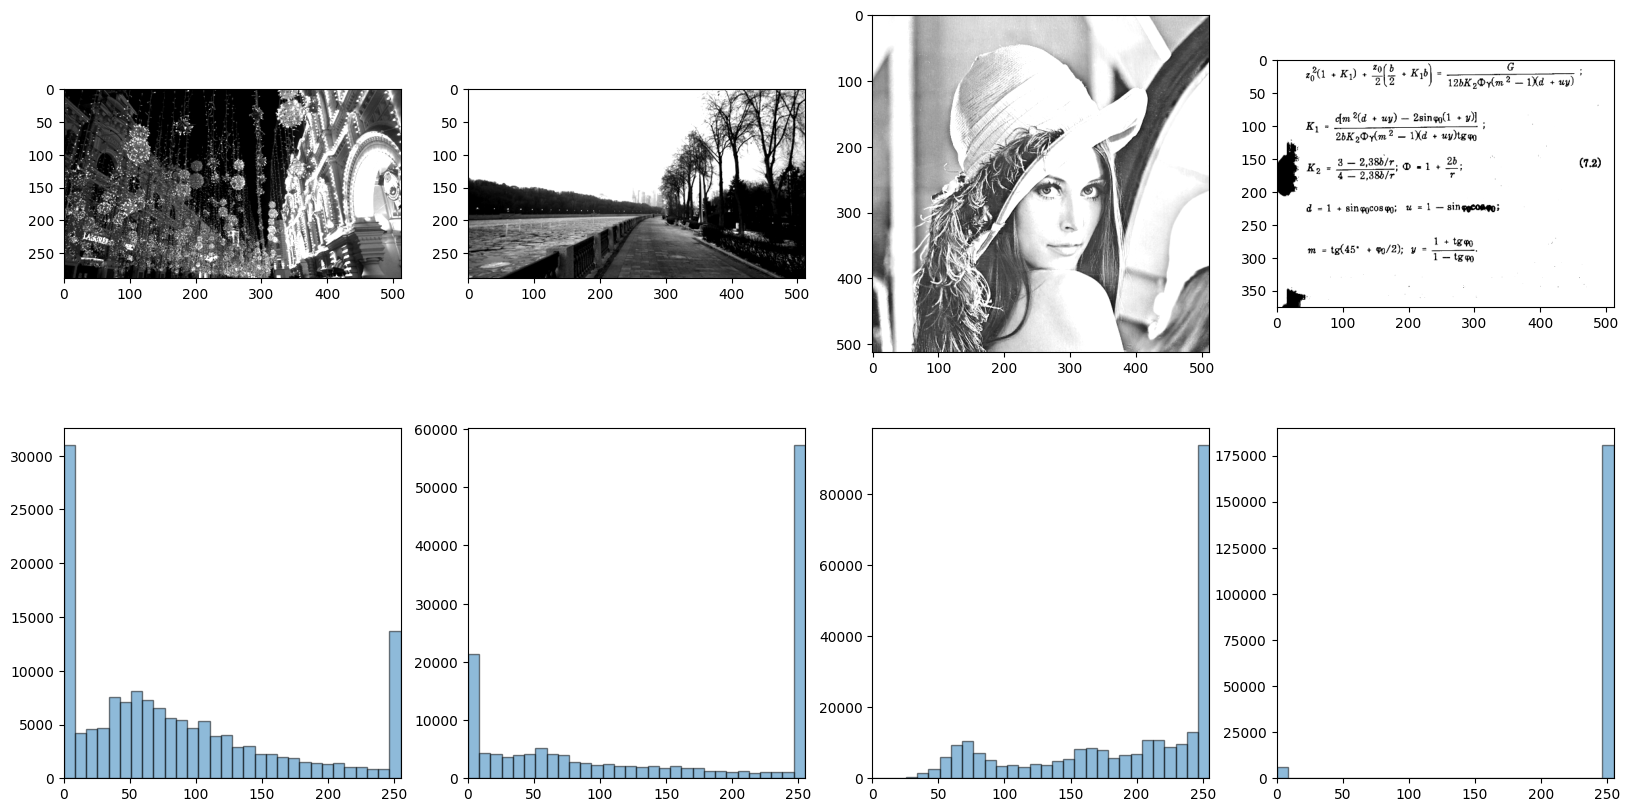

In [5]:
k = 2
b = -50
images_ci = []
for i in range(4):
    images_ci.append(change_intence(gray_images[i], k, b))

f.draw_plots(images_ci, (20, 10))

In [6]:
def auto_contrast(img, borders=True):
    img_arr = np.array(img).reshape(-1)
    if borders:
        hist_min = np.min(img_arr)
        img_tmp = change_intence(img, 1, -hist_min)
        img_arr = np.array(img_tmp).reshape(-1)
        hist_max = np.max(img_arr)
        new_k = 255/hist_max
        return change_intence(img_tmp, new_k, 0)
    else:
        img_tmp = []
        hist_min = np.min([x for x in img_arr if x > 0])
        for x in np.array(img):
            img_tmp.append(np.where(pd.Series(x).between(1, 254), x - hist_min + 1, x))   
        
        img_arr = np.array(img_tmp).reshape(-1)
        hist_max = np.max([x for x in img_arr if x < 255])
        new_k = 253/hist_max
        new_img_tmp = []
        for x in img_tmp:
            new_img_tmp.append(np.where(pd.Series(x).between(2, 254), new_k * x, x))
        return new_img_tmp

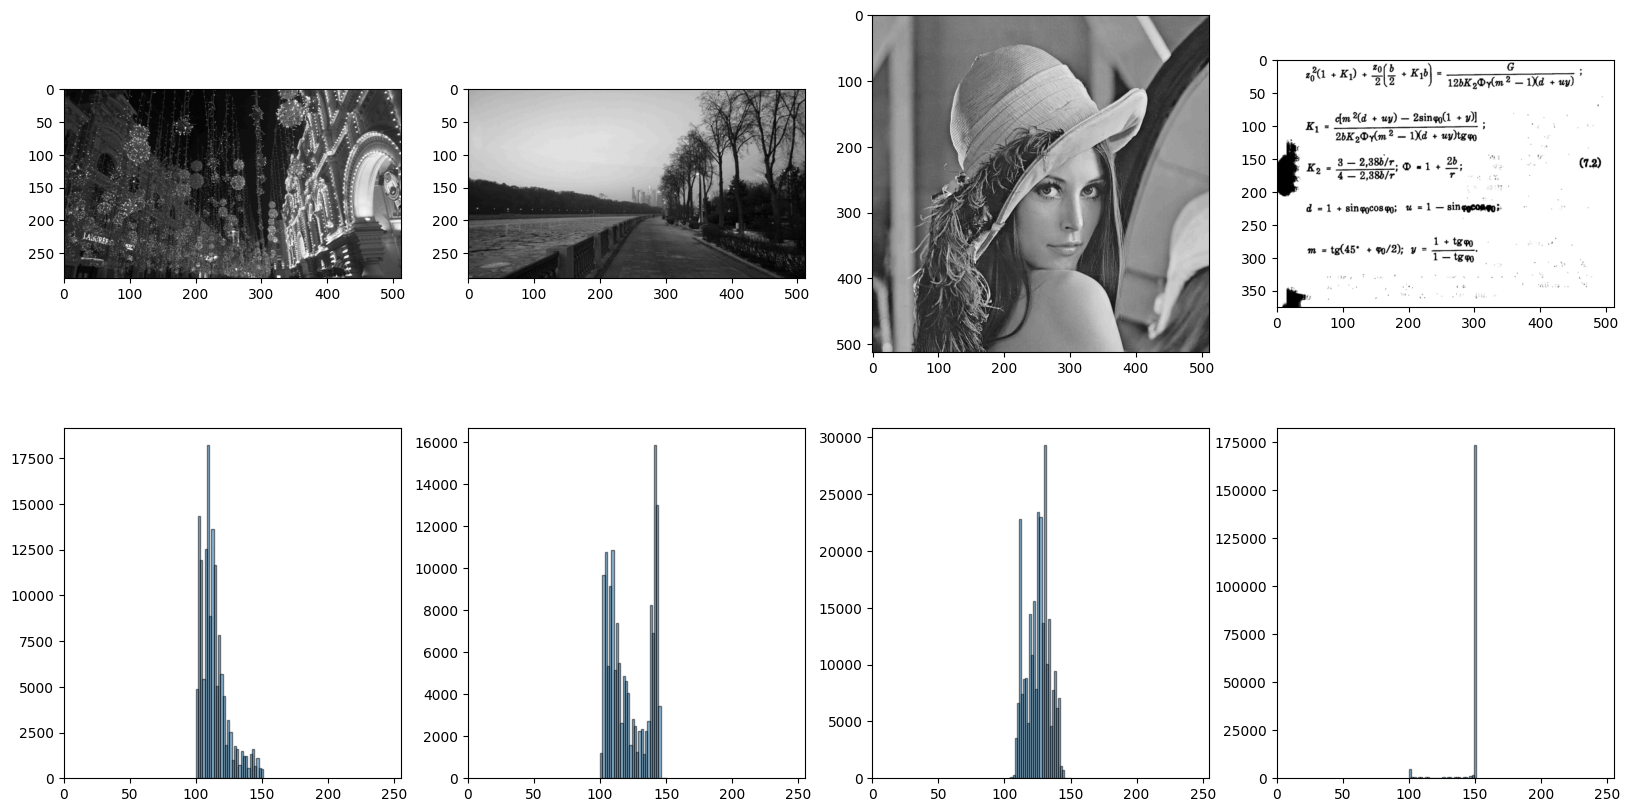

In [7]:
k = 0.2
b = 100
images_tmp = []
for i in range(4):
    images_tmp.append(change_intence(gray_images[i], k, b))
f.draw_plots(images_tmp, (20, 10))

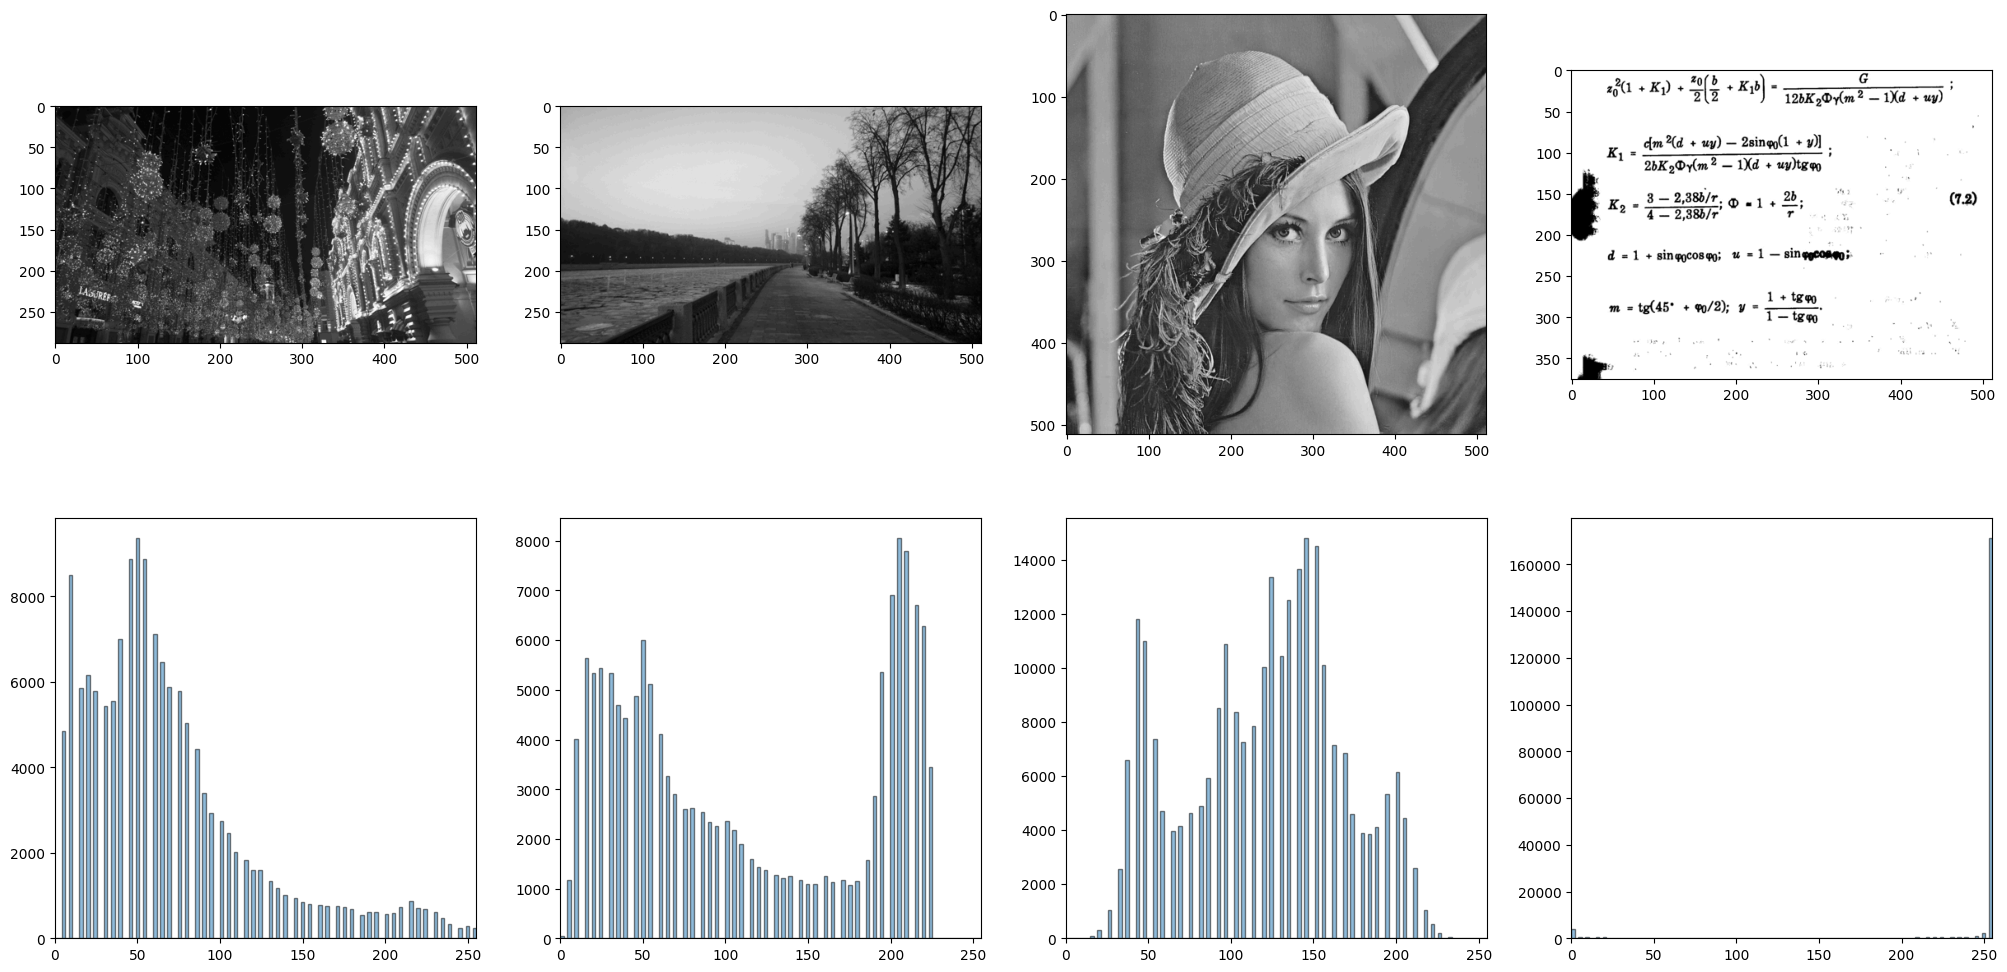

In [8]:
images_ac = []
for i in range(4):
    images_ac.append(auto_contrast(images_tmp[i]))
f.draw_plots(images_ac, (25, 12), 120)

In [9]:
for i in range(4):
    print(len(np.unique(np.array(images_ac[i]).reshape(-1))))

52
52
47
52


In [10]:
def percent_correction(img, p_l, p_r):
    img_arr = np.array(img)
    pixel_num = img_arr.shape[0] * img_arr.shape[1]
    ind = np.unravel_index(np.argsort(img_arr, axis=None), img_arr.shape)
    n_l = int(pixel_num * p_l)
    n_r = int(pixel_num * p_r)
    print(n_l, n_r)
    
    tmp_img = copy.copy(img_arr)
    for i in range(n_l):
        tmp_img[ind[0][i]][ind[1][i]] = 255
    for i in range(pixel_num - n_r, pixel_num):
        tmp_img[ind[0][i]][ind[1][i]] = 0
    
    #return tmp_img
    return auto_contrast(tmp_img, False)

1920 0


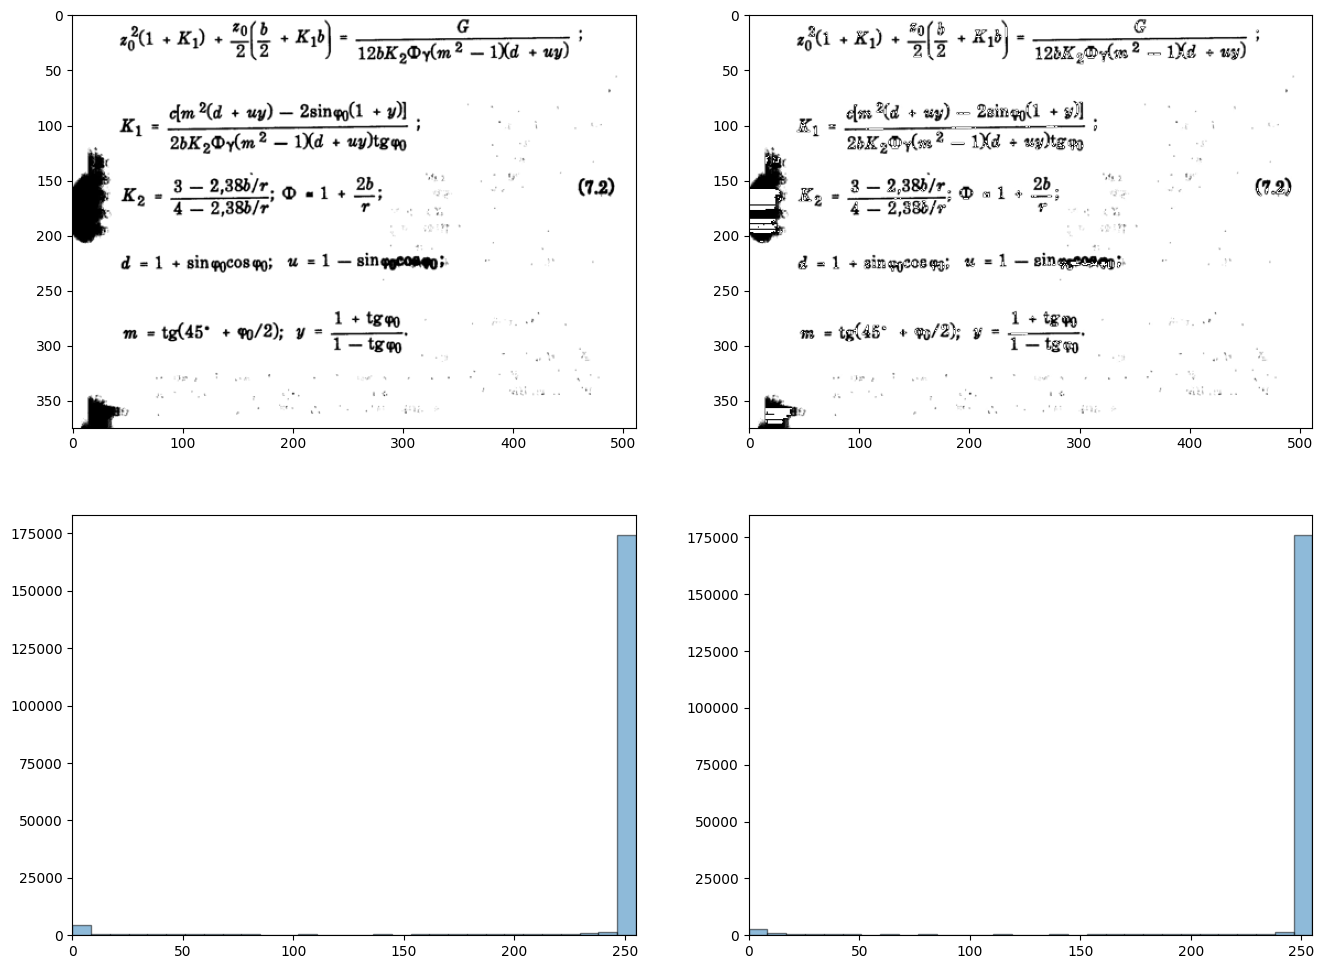

In [11]:
img_pc_1 = percent_correction(gray_images[3], 0.01, 0)

f.draw_plots([gray_images[3], img_pc_1], (16, 12))

1474 737


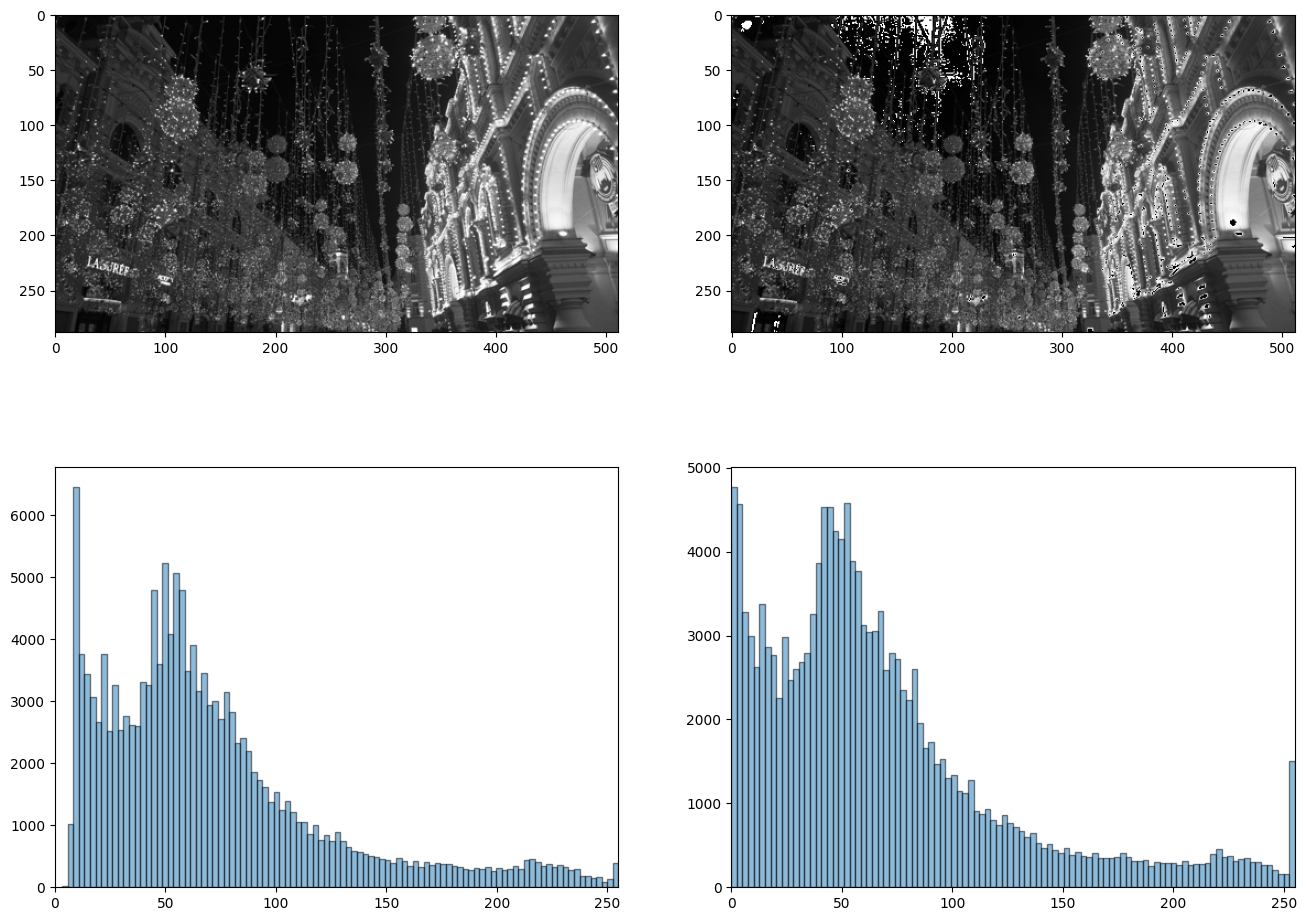

In [12]:
img_pc_2 = percent_correction(gray_images[0], 0.01, 0.005)

f.draw_plots([gray_images[0], img_pc_2], (16, 12), 100)